# 사용 모듈 설치

In [1]:
! pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)


In [2]:
! pip install beautifulsoup4

  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)


In [4]:
! pip install matplotlib


  Using cached matplotlib-3.10.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp310-cp310-macosx_10_9_universal2.whl.metadata (165 kB)
  Using cached pillow-11.0.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp310-cp310-macosx_10_9_universal2.whl (2.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 20.2 MB/s eta 0:00:0031m9.7 MB/s eta 0:00:01
Using cached pillow-11.0.0-cp310-cp310-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [16]:
! pip install wordcloud


# www.goso.co.kr 웹크롤링

In [11]:
import requests
from bs4 import BeautifulSoup
import json

base_url = "http://www.goso.co.kr/bbs/board.php?bo_table=testDB&page="
start_page = 2441
end_page = 2584
step = 20

for batch_start in range(start_page, end_page + 1, step):
    batch_end = min(batch_start + step - 1, end_page)
    result = []

    for page in range(batch_start, batch_end + 1):
        url = f"{base_url}{page}"
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to fetch page {page}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        for row in soup.select('tr'):
            category = row.select_one('.cate')
            title = row.select_one('.subject')
            datetime = row.select_one('.datetime')
            company = row.select_one('.company')
            if category and title and '여행' in category.text:
                result.append(dict(
                    title=title.text.strip(),
                    category=category.text.strip(),
                    datetime=datetime.text.strip() if datetime else "",
                    company=company.text.strip() if company else ""
                ))

    # Save JSON for the current batch
    if result:
        json_filename = f"prac_goso_{batch_start}_{batch_end}.json"
        with open(json_filename, 'w', encoding='utf-8') as json_file:
            json.dump(result, json_file, ensure_ascii=False)
        print(f"Saved {len(result)} records to {json_filename}")
    else:
        print(f"No data found for pages {batch_start} to {batch_end}")


Saved 12 records to prac_goso_2441_2460.json
Saved 7 records to prac_goso_2461_2480.json
Saved 10 records to prac_goso_2481_2500.json
Saved 20 records to prac_goso_2501_2520.json
Saved 14 records to prac_goso_2521_2540.json
Saved 9 records to prac_goso_2541_2560.json
Saved 20 records to prac_goso_2561_2580.json
Saved 3 records to prac_goso_2581_2584.json


# JSON 파일 merge

In [ ]:
import os
import json

# JSON 파일들이 저장된 디렉토리 경로
json_dir = './project'  # 현재 디렉토리 기준, 필요에 따라 수정
output_file = 'merged_goso.json'

# 모든 JSON 파일의 데이터를 병합할 리스트
merged_data = []

# 디렉토리 내 JSON 파일 목록 가져오기
json_files = [file for file in os.listdir(json_dir) if file.endswith('.json') and file.startswith('prac_goso_')]

for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r', encoding='utf-8') as f:
        try:
            data = json.load(f)
            merged_data.extend(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON from file {json_file}: {e}")

# 병합된 데이터를 하나의 JSON 파일로 저장
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(merged_data, f, ensure_ascii=False, indent=4)

print(f"Merged JSON file created: {output_file}")

In [12]:
import os
import json

# JSON 파일들이 저장된 디렉토리 경로
json_dir = '../data/project_json'  # 현재 디렉토리 기준, 필요에 따라 수정
output_file = 'unique_merged_goso.json'

# 모든 JSON 파일의 데이터를 병합할 리스트
merged_data = []

# 디렉토리 내 JSON 파일 목록 가져오기
json_files = [file for file in os.listdir(json_dir) if file.endswith('.json') and file.startswith('prac_goso_')]

for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r', encoding='utf-8') as f:
        try:
            data = json.load(f)
            merged_data.extend(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON from file {json_file}: {e}")

# 중복 제거 (list of dicts를 set으로 변환하여 중복 제거)
unique_data = list({json.dumps(item, ensure_ascii=False): item for item in merged_data}.values())

# 병합된 데이터를 하나의 JSON 파일로 저장
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(unique_data, f, ensure_ascii=False, indent=4)

print(f"Unique merged JSON file created: {output_file}")


Unique merged JSON file created: unique_merged_goso.json


# 날짜(6,7,8,9,10,11) 필터링

In [14]:
import json

# JSON 파일 읽기
with open('unique_merged_goso.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 필터링: 9월, 10월, 11월 데이터만 추출
filtered_data = [item for item in data if item['datetime'].startswith(('06-','07-','08-','09-', '10-', '11-'))]

# 필터링된 데이터 출력
with open('date_filtered_goso_06_11.json', 'w', encoding='utf-8') as file:
    json.dump(filtered_data, file, ensure_ascii=False, indent=4)

print("Filtered data saved to 'date_filtered_goso_06_11.json'.")


Filtered data saved to 'date_filtered_goso_06_11.json'.


# company

Company counts: Counter({'아고다': 234, '여기어때': 101, '야놀자': 91, '트립닷컴': 76, '티몬': 74, '하나투어': 52, '마이리얼트립': 43, '노랑풍선': 39, '아시아나항공': 36, '배달의민족': 33, '모두투어': 28, '제주항공': 28, '국외항공사': 25, '부킹닷컴': 25, '대한항공': 24, '티웨이항공': 23, '인터파크투어': 23, '클룩': 21, '마이트립': 18, '와이페이모어': 18, '위메프': 15, '업체': 15, '진에어': 15, '배달의': 13, '투어비스': 12, '에어부산': 11, '이스타항공': 10, '롯데관광': 10, '요기요': 9, '참좋은여행': 9, '호텔스닷컴': 8, 'Trip.com': 8, '배달의 민족': 8, '온라인투어': 8, '에어비앤비': 7, '카카오T': 7, '선민투어': 6, '쏘카': 6, '제주올레투어': 6, '에어서울': 6, '세탁특공대': 5, '쿠팡': 5, '당근마켓': 5, '쿠팡이츠': 5, '카카오택시': 5, '미소': 4, '나드리투어': 4, '삼쩜삼': 4, '교원투어': 4, '에어로케이': 4, '카카오톡': 4, '투어컴': 4, '교원투어 여행이지': 4, '트리플': 3, '스마트인피니': 3, '코레일': 3, '익스피디아': 3, '네이버': 3, '큐재팬': 3, '버스타고': 3, '고코투어': 3, '인터파크티켓': 3, '카카오모빌리티': 3, '쿨룩': 3, '런드리고': 2, '아이파킹': 2, '마이트립닷컴': 2, 'ONDA': 2, 'SRT': 2, '마인드투어': 2, '캠핑톡': 2, '콜버스': 2, '네이버 예약': 2, '천마고속': 2, '플레이스토리': 2, 'My trip': 2, '(주)티몬': 2, '씨마크호텔': 2, '스토리투어': 2, '구글': 2, '여행이지 ( 교원투어 )': 2, '인천에어포트오션사이드호텔': 2, 't

/var/folders/ly/q95qq9b15wq_cmvm_6tyh_1h0000gn/T/ipykernel_5115/58058368.py:26: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ly/q95qq9b15wq_cmvm_6tyh_1h0000gn/T/ipykernel_5115/58058368.py:26: UserWarning: Glyph 45440 (\N{HANGUL SYLLABLE NOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ly/q95qq9b15wq_cmvm_6tyh_1h0000gn/T/ipykernel_5115/58058368.py:26: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ly/q95qq9b15wq_cmvm_6tyh_1h0000gn/T/ipykernel_5115/58058368.py:26: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ly/q95qq9b15wq_cmvm_6tyh_1h0000gn/T/ipykernel_5115/58058368.py:26: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ly/q95qq9b15wq_cmvm_6tyh_1h0000gn/T/ipykernel_5115/58058368.py

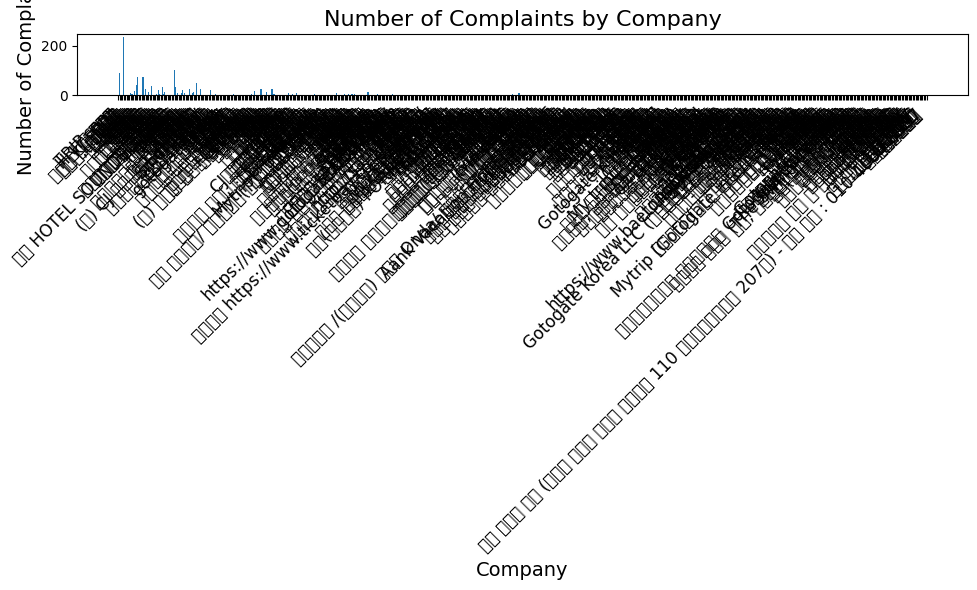

In [15]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# JSON 파일 읽기
with open('date_filtered_goso_06_11.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# company별로 데이터 그룹화
company_counts = Counter(item['company'] for item in data)

# 데이터 확인
print("Company counts:", company_counts)

# 시각화를 위한 데이터 준비
companies = list(company_counts.keys())
counts = list(company_counts.values())

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(companies, counts)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)
plt.title('Number of Complaints by Company', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# 그래프 저장 및 출력
plt.savefig('complaints_by_company.png')
plt.show()


# 필터링

In [7]:
import json

# JSON 파일 읽기
with open('date_filtered_goso.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# '항공'이 포함된 company 필터링
filtered_data = [
    entry for entry in data if '항공' in entry.get('company', '')
]

# 결과를 새로운 JSON 파일로 저장
with open('filtered_airline_companies.json', 'w', encoding='utf-8') as outfile:
    json.dump(filtered_data, outfile, ensure_ascii=False, indent=4)

print(f"Filtered data contains {len(filtered_data)} entries.")


Filtered data contains 94 entries.


### 소거법

In [27]:
import json

# JSON 파일 읽기
with open('date_filtered_goso.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 제외할 단어 리스트 설정
excluded_keywords = keywords = keywords = [
    "선택관광",
    "숙박권",
    "숙박업",
    "디즈니씨티켓",
    "디즈니플러스",
    "eSIM",
    "숙박업체",
    "헬로라이브",
    "쿠팡이트",
    "캐리비안베이",
    "제페토 게임",
    "가사도우미",
    "사장",
    "배달의민족",
    "숙소포인트",
    "호텔측",
    "코레일",
    "요기요",
    "배편",
    "페러세일링",
    "쏘카",
    "영덕씨레스트풀빌라",
    "해외숙소",
    "택배",
    "버스 탑승권",
    "티머니고",
    "미소 (가사도우미)",
    "워드라이브그룹에 가입 폐업으로(1)",
    "위드라이프그룹",
    "리조트",
    "한화리조트",
    "배달의 민족",
    "HOTEL",
    "사장의",
    "주차요금이",
    "숙소포인트",
    "비비둥둥",
    "호텔측",
    "숙박할수도",
    "코레일",
    "동백여행사",
    "요기요",
    "위메프숙박",
    "숙소환불",
    "숙소환불문의(1)",
    "호텔에서",
    "미소 (가사도우미)",
    "영덕씨레스트풀빌라",
    "사진과대광고",
    "반품",
    "송장",
    "호텔예약",
    "렌트카",
    "렌트카일정",
    "시외버스",
    "건강한친구들",
    "중고거래",
    "중소나라",
    "중고나라",
    "불법 차량 운행(1)",
    "숙소예약하고",
    "틱톡",
    "썸머빌",
    "렌트",
    "번개장터",
    "세탁물",
    "런드리고",
    "해든산악회",
    "파티룸",
    "주차장",
    "캠핑톡",
    "당근마켓",
    "삼쩜삼",
    "객실",
    "실제객실이",
    "콘도업체(1)",
    "호텔비",
    "아이파킹",
    "파인시네마",
    "워드라이브그룹",
    "범포주",
    "옷깃",
    "호텔예약",
    "숙박"
]


# 객실, 호텔, 숙박, 렌트카,  숙소 , 주차, 풀빌라, 세탁

# 제외할 단어가 포함되지 않은 데이터 필터링
filtered_data = [
    item for item in data 
    if not any(keyword in item['title'] for keyword in excluded_keywords)
]

# 필터링된 데이터 저장
with open('filtered_title_goso.json', 'w', encoding='utf-8') as output_file:
    json.dump(filtered_data, output_file, ensure_ascii=False, indent=4)

print("필터링된 데이터가 'filtered_title_goso.json'에 저장되었습니다.")


필터링된 데이터가 'filtered_title_goso.json'에 저장되었습니다.


### 충족

In [31]:
import json

# JSON 파일 읽기
with open('date_filtered_goso_06_11.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 포함할 단어 리스트 설정
# included_keywords = ["항공", "대한", "아시아나", "제주", "진에어", "아시아나항공", "대한항공", "티웨이", "티웨이항공", "제주항공"]
included_keywords = ["항공", "에어"]


# 특정 단어가 포함된 데이터 필터링
filtered_data = [
    item for item in data 
    if any(keyword in item['company'] for keyword in included_keywords)
]

# 필터링된 데이터 저장
with open('included_company_filtered_goso_06_11.json', 'w', encoding='utf-8') as output_file:
    json.dump(filtered_data, output_file, ensure_ascii=False, indent=4)

print("특정 단어가 포함된 데이터가 'included_company_filtered_goso_06_11.json'에 저장되었습니다.")


특정 단어가 포함된 데이터가 'included_company_filtered_goso_06_11.json'에 저장되었습니다.


### 시각화

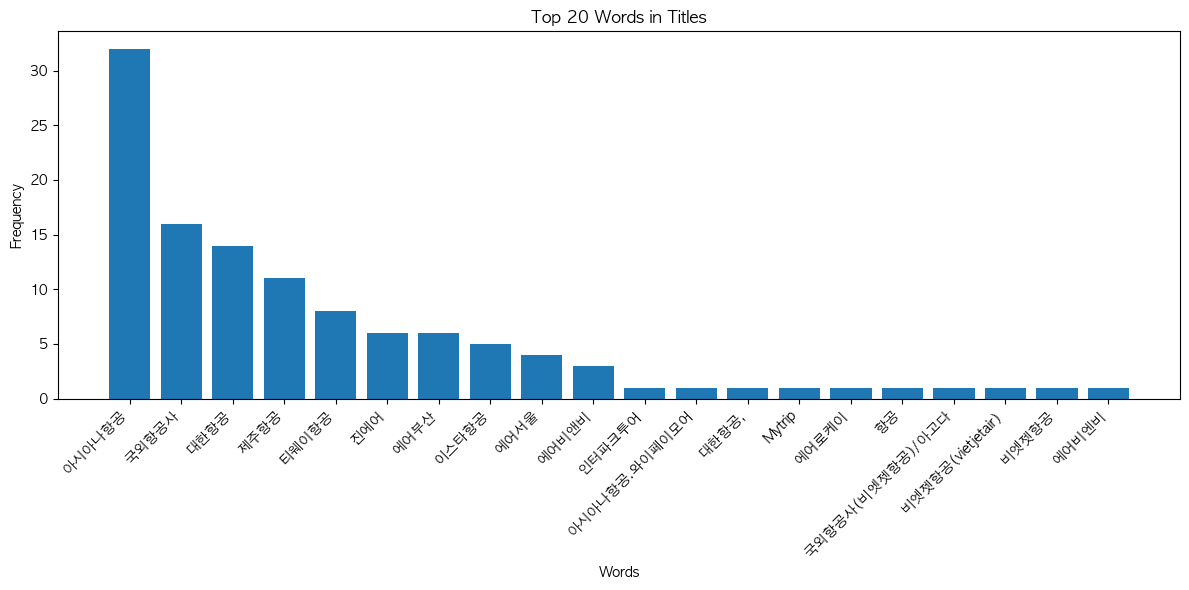

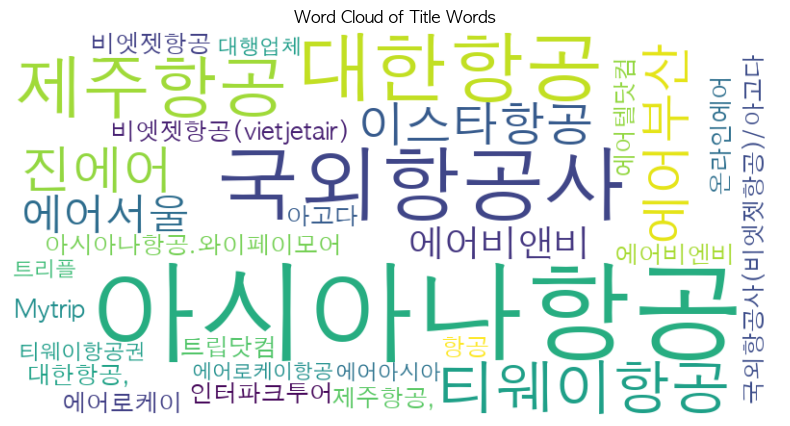

In [29]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정 (사용자 시스템에 설치된 폰트 경로)
# Windows 예: 'C:/Windows/Fonts/malgun.ttf'
# Mac 예: '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# Linux 예: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
with open('included_company_filtered_goso.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 단어 추출
all_words = []
for item in data:
    title = item.get('company', '')
    words = title.split()
    all_words.extend(words)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

# 단어와 빈도로 분리
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Titles')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Words')
plt.show()


In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 한글 폰트 경로 설정 (사용자 시스템에 설치된 폰트 경로)
# Windows 예: 'C:/Windows/Fonts/malgun.ttf'
# Mac 예: '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# Linux 예: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.tt'  # 사용자 환경에 맞게 경로 수정

# 데이터 준비 (예제)
titles = ['파이썬', '데이터', '분석', '데이터', '파이썬', '시각화', '데이터']
word_counts = Counter(titles)

# 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (한글 지원)')
plt.show()


OSError: cannot open resource

In [ ]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 설정 (Mac용: AppleGothic, Windows: Malgun Gothic)
rc('font', family='AppleGothic')  # Mac
# rc('font', family='Malgun Gothic')  # Windows

# JSON 파일 불러오기
with open('date_filtered_goso_06_11.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 단어 추출
all_words = []
for item in data:
    title = item.get('title', '')
    words = title.split()
    all_words.extend(words)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

# 단어와 빈도로 분리
words, counts = zip(*top_words)

# 한글 깨짐 방지 (음수 축 방향 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('제목에서 가장 많이 사용된 단어 상위 20개')
plt.ylabel('빈도수')
plt.xlabel('단어')
plt.tight_layout()
plt.show()

# 워드클라우드 시각화
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # Mac 사용자의 한글 폰트 경로
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('제목 단어 워드클라우드')
plt.show()


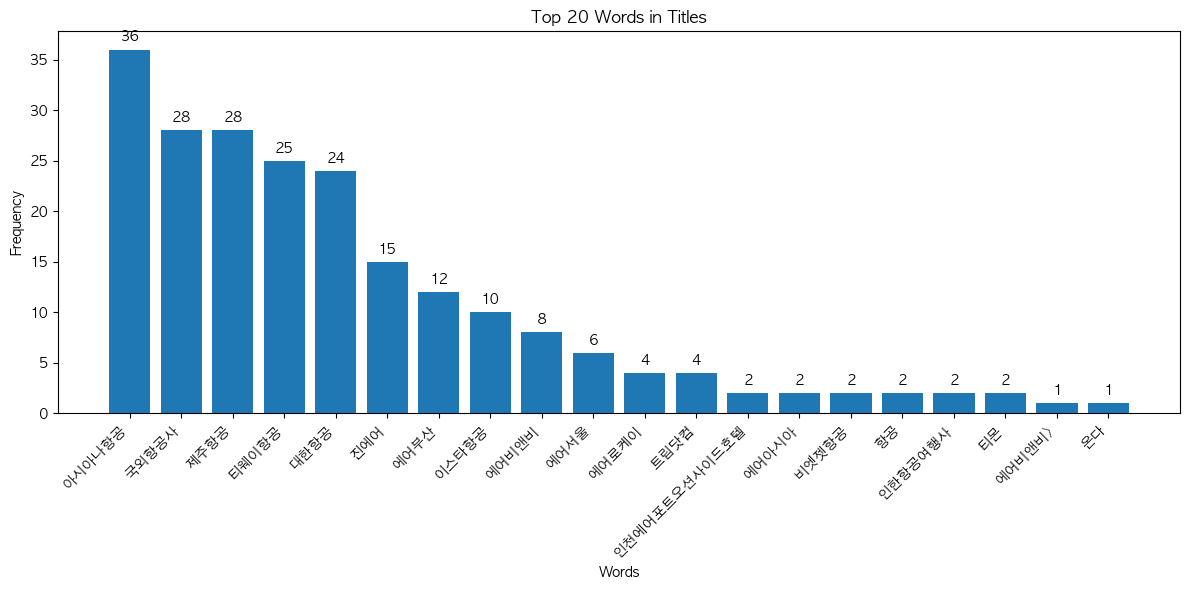

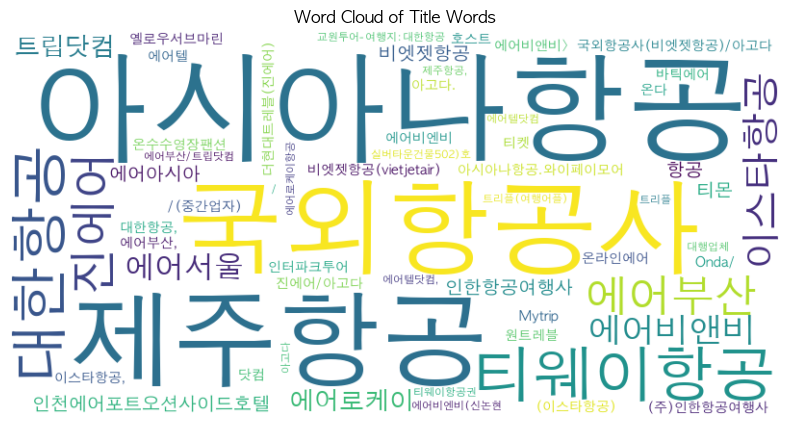

In [33]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정 (사용자 시스템에 설치된 폰트 경로)
# Windows 예: 'C:/Windows/Fonts/malgun.ttf'
# Mac 예: '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# Linux 예: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
with open('included_company_filtered_goso_06_11.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 단어 추출
all_words = []
for item in data:
    title = item.get('company', '')
    words = title.split()
    all_words.extend(words)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

# 단어와 빈도로 분리
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Titles')
plt.ylabel('Frequency')
plt.xlabel('Words')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Words')
plt.show()


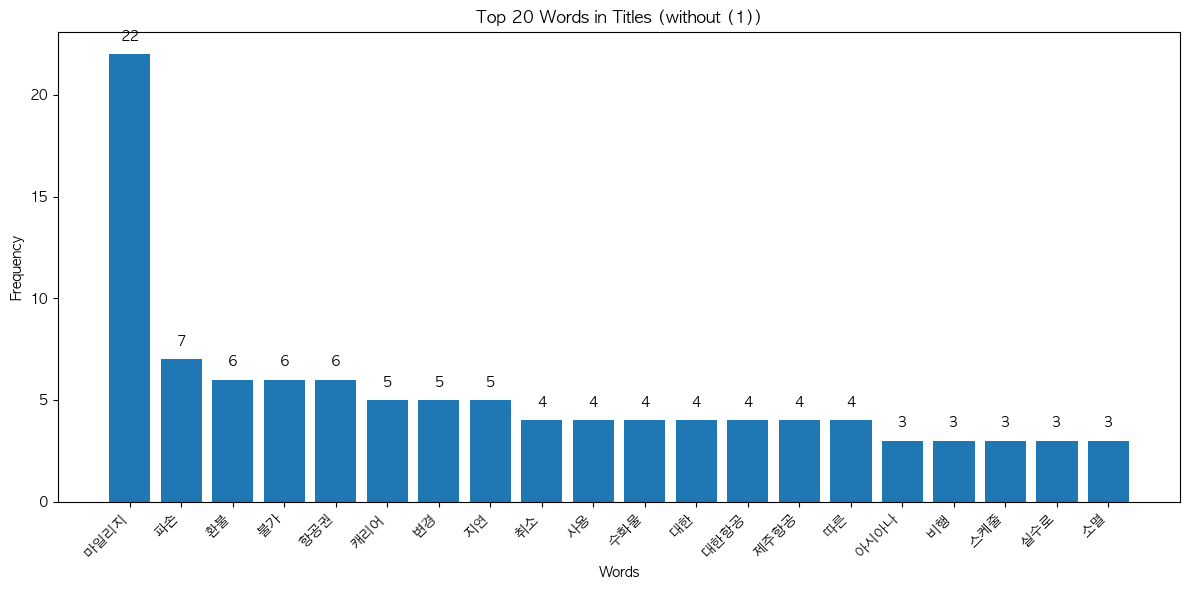

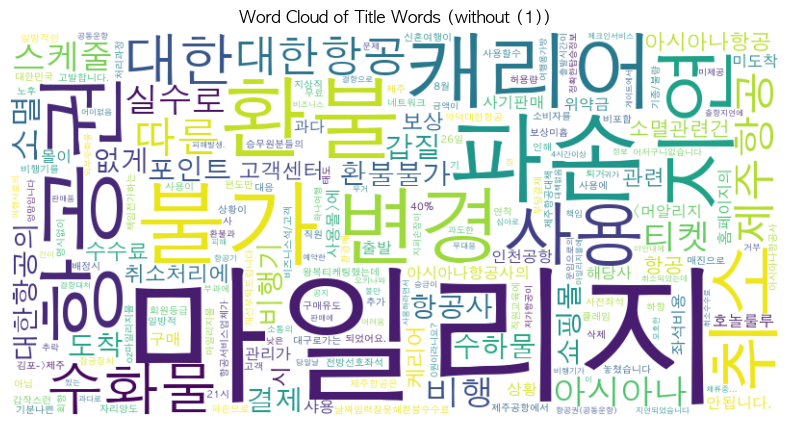

In [46]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정 (사용자 시스템에 설치된 폰트 경로)
# Windows 예: 'C:/Windows/Fonts/malgun.ttf'
# Mac 예: '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# Linux 예: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
# with open('included_company_filtered_goso_06_11.json', 'r', encoding='utf-8') as json_file:
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 단어 추출 ("(1)" 제거)
all_words = []
for item in data:
    title = item.get('title', '').replace('(1)', '').replace('…', '').replace('및', '').replace('인한', '').strip()
    # title = item.get('title', '').strip()
    words = title.split()
    all_words.extend(words)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

# 단어와 빈도로 분리
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Titles (without (1))')
plt.ylabel('Frequency')
plt.xlabel('Words')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Words (without (1))')
plt.show()


Top 20 Words: [('마일리지', 22), ('파손', 7), ('항공권', 7), ('환불', 6), ('불가', 6), ('지연', 6), ('캐리어', 5), ('변경', 5), ('취소', 4), ('사용', 4), ('수화물', 4), ('대한', 4), ('대한항공', 4), ('제주항공', 4), ('아아나', 3), ('비행', 3), ('항공사', 3), ('스케줄', 3), ('실수로', 3), ('소멸', 3)]


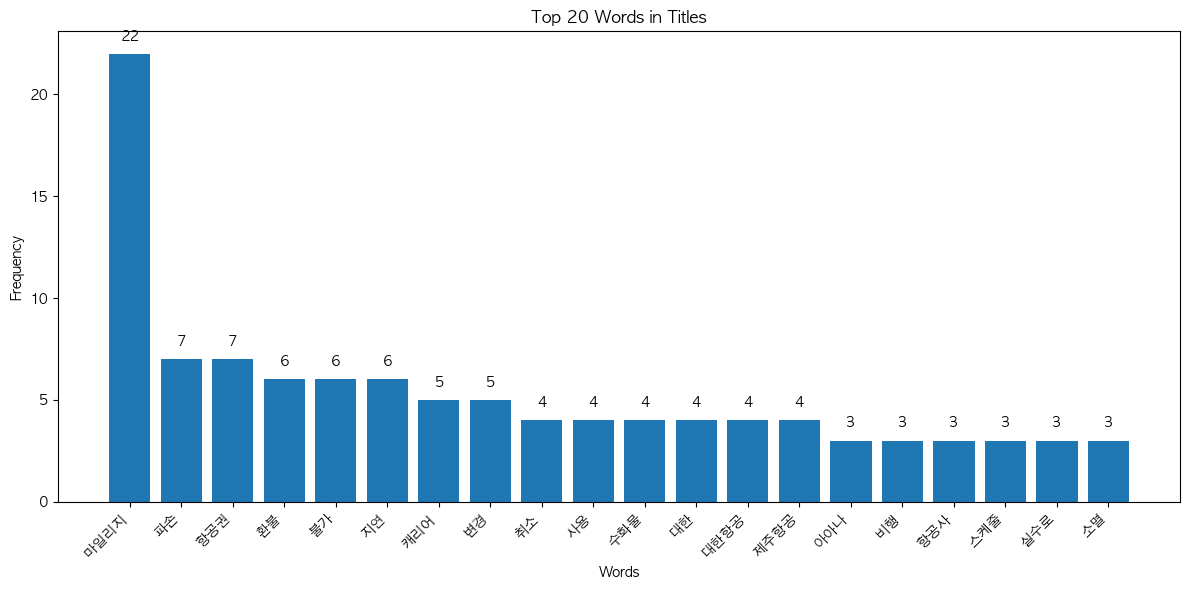

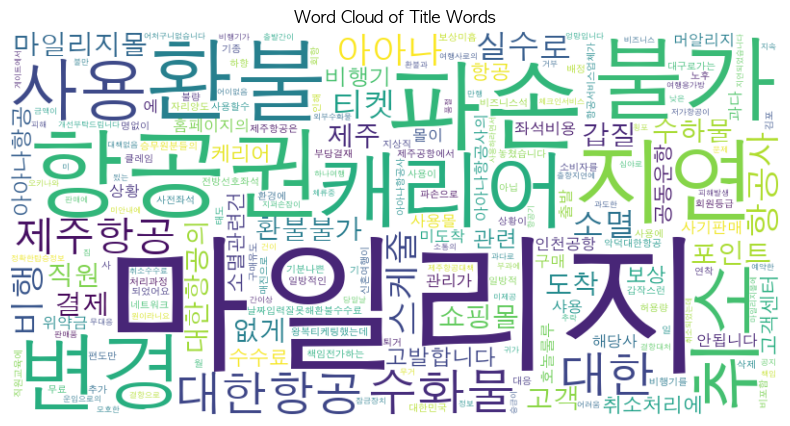

In [41]:
import json
from collections import Counter
import re
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # Mac
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 단어 빈도수 계산
word_counts = Counter()

for item in data:
    title = item.get('title', '').replace('및', '').replace('따른', '').replace('시', '').replace('인한', '').strip()
    # 모든 단어 추출 (특정 단어 포함 여부 자동 탐지)
    words = re.findall(r'[가-힣]+', title)  # 한글 단어 추출
    for word in words:
        word_counts[word] += 1

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

# 단어와 빈도로 분리
words, counts = zip(*top_words)

# 단어 빈도 출력
print("Top 20 Words:", top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Titles')
plt.ylabel('Frequency')
plt.xlabel('Words')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Words')
plt.show()
